In [1]:
import cartopy.crs as ccrs
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter, FFMpegFileWriter
from IPython.display import HTML
import numpy as np
from itertools import product
import pandas as pd

In [2]:
paths = ['/storage/data/eumetsat/native/reprojected2/2019-01-{:02d}T{:02d}.nc'.format(day, hour) for day, hour in list(product(range(1, 20), range(7, 17)))]

In [3]:
%%time
dataset = xr.open_mfdataset(paths=paths, concat_dim='time')
da = dataset['HRV']

/home/jack/miniconda3/envs/sat_image_processing/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  """Entry point for launching an IPython kernel.
/home/jack/miniconda3/envs/sat_image_processing/lib/python3.7/site-packages/xarray/backends/api.py:931: FutureWarning: Also `open_mfdataset` will no longer accept a `concat_dim` argument.
To get equivalent behaviour from now on please use the new
`combine_nested` function instead (or the `combine='nested'` option to
`open_mfdataset`).The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to c

CPU times: user 1.46 s, sys: 108 ms, total: 1.56 s
Wall time: 4.46 s


In [39]:
def get_normalised_array(i=0):
    data = da[i, 2400:3500, 2200:3500]
    data -= data.min()
    data /= data.max()
    return data

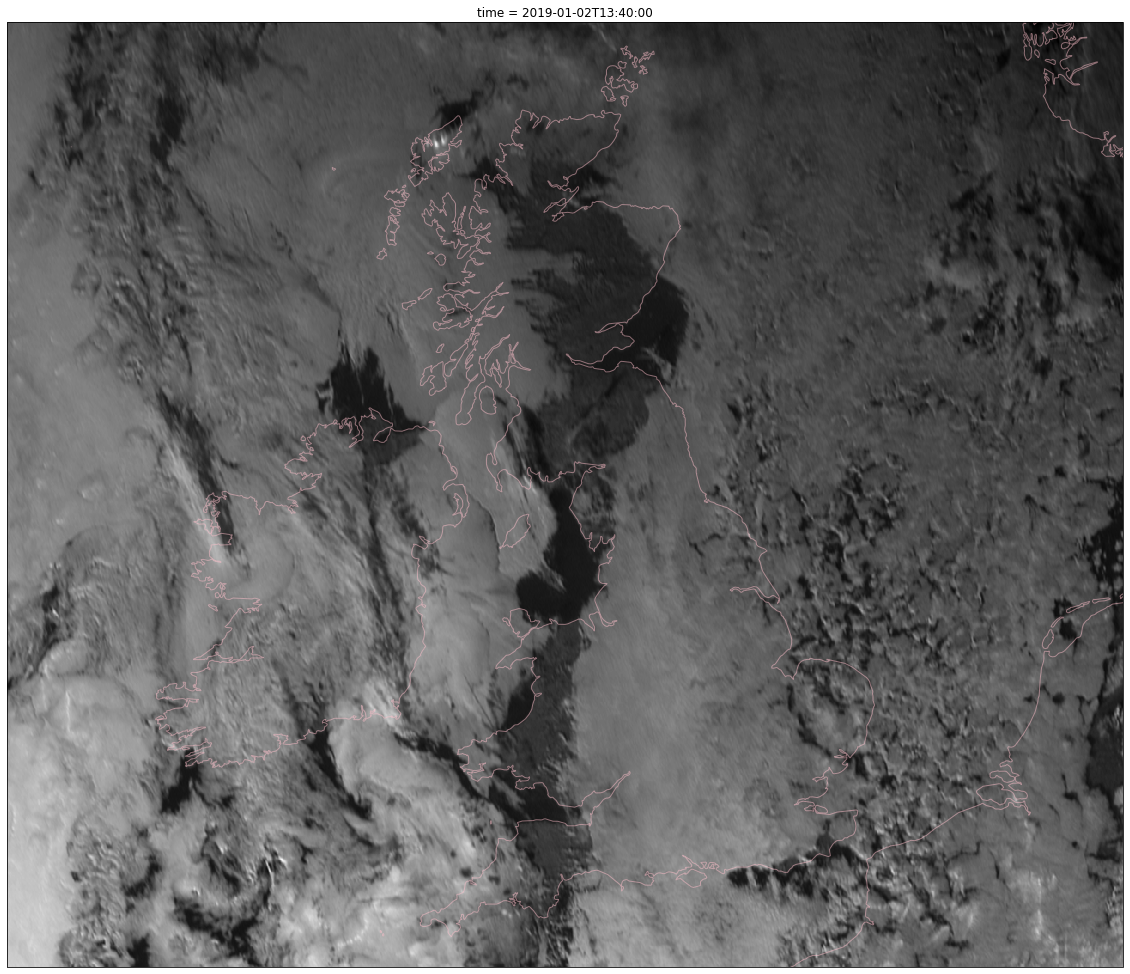

In [86]:
fig = plt.figure(figsize=(20, 20))
crs = ccrs.TransverseMercator()
ax = plt.axes(projection=crs)
ax.coastlines(resolution='10m', alpha=0.5, color='pink')

img = get_normalised_array(200).plot.imshow(ax=ax, cmap='gray', origin='upper', vmin=0, vmax=1, add_colorbar=False)

/home/jack/miniconda3/envs/sat_image_processing/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  import sys


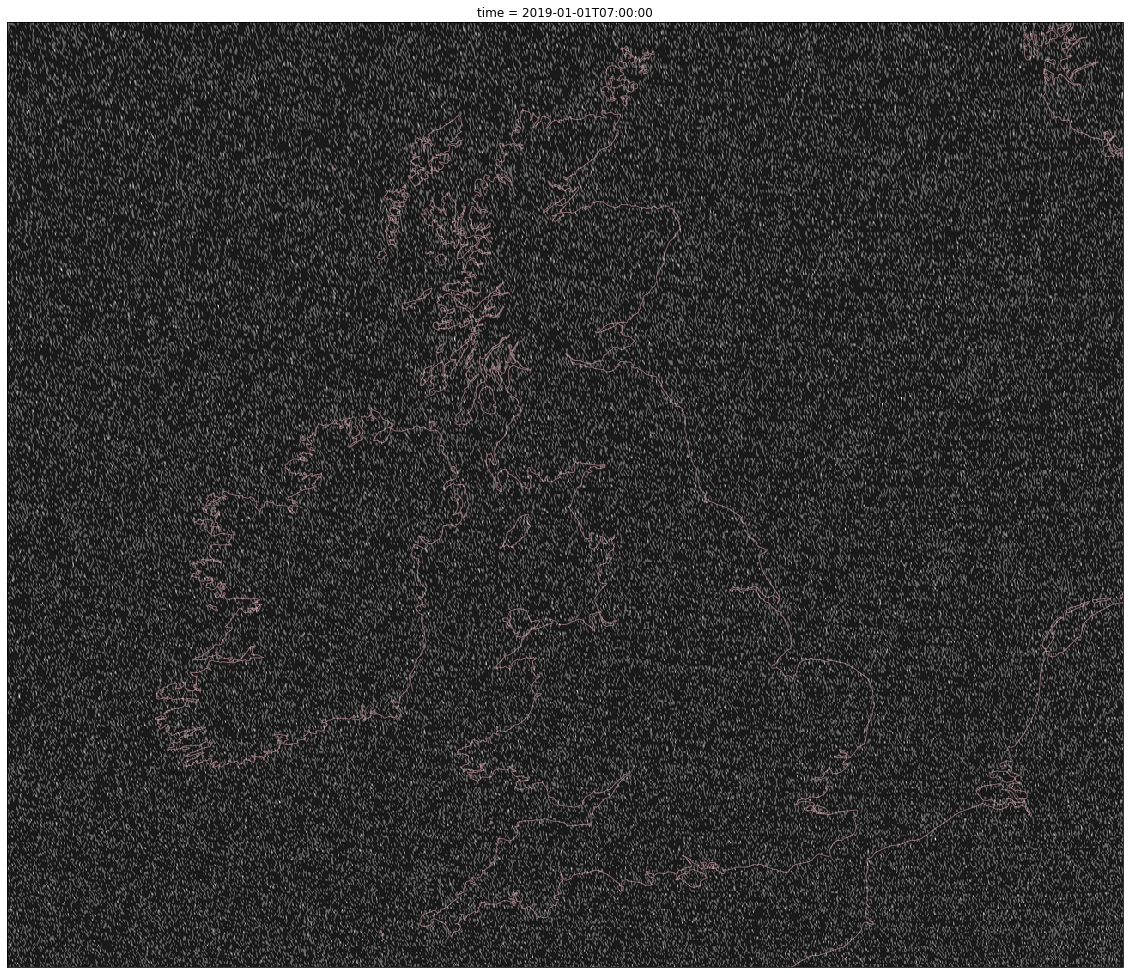

In [89]:
fig = plt.figure(figsize=(20, 20))
crs = ccrs.TransverseMercator()
ax = plt.axes(projection=crs)
ax.coastlines(resolution='10m', alpha=0.5, color='pink')

img = get_normalised_array().plot.imshow(ax=ax, cmap='gray', origin='upper', vmin=0, vmax=1, add_colorbar=False)
plt.tight_layout()

def init():
    img.set_data(get_normalised_array())
    return img,

def update(i):
    data = get_normalised_array(i)
    img.set_data(data)
    ts = pd.Timestamp(data.time.item())
    ax.set_title(ts)
    return img,

#anim = FuncAnimation(fig, func=update, frames=np.arange(1, da.time.size), init_func=init, interval=100, blit=True)
#anim.save('clouds.gif', writer='imagemagick')
#html = anim.to_html5_video()
#HTML(html)

In [90]:
#anim.save(filename='clouds.gif', writer=FFMpegFileWriter, dpi=80)

In [91]:
# Docs: https://matplotlib.org/3.1.1/api/animation_api.html#writer-classes
moviewriter = FFMpegFileWriter(fps=10)
init()
with moviewriter.saving(fig, 'myfile4.mp4', dpi=100):
    for i in np.arange(1, 200): #da.time.size):
        update(i)
        moviewriter.grab_frame()